In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Part I: Segmentation

In [3]:
water_rides=pd.read_csv("/Users/luoyayuan/Desktop/Class Slides/654/assignment2/water_rides.csv")
water_rides.head()

,rideID,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
0,1,4,27.47,59.64,4.0,658.35,66.77,7389.98,46702.30,4980.30
1,2,4,25.02,106.54,6.0,455.65,48.15,11757.48,54579.92,5313.93
2,3,5,30.82,61.17,6.0,536.13,65.02,9403.26,51244.81,5510.27
3,4,1,34.10,97.18,6.0,673.44,62.18,6191.53,50332.71,5039.14
4,5,3,30.38,89.46,5.0,518.29,75.54,9632.71,50069.21,6169.58


question-A: Drop the rideID variable.

Why will rideID not be relevant in a clustering model? In your answer, do not just write “it will confuse the model.” Instead, take the time to explain this with a sentence or two, using a bit of math and your understanding of Euclidean distance.

In [4]:
water_rides.drop('rideID',1,inplace=True)

/var/folders/69/sjzrfpp90kb586qq0vrpgyjw0000gn/T/ipykernel_4975/3150238303.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  water_rides.drop('rideID',1,inplace=True)


In [5]:
water_rides.head()

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
0,4,27.47,59.64,4.0,658.35,66.77,7389.98,46702.30,4980.30
1,4,25.02,106.54,6.0,455.65,48.15,11757.48,54579.92,5313.93
2,5,30.82,61.17,6.0,536.13,65.02,9403.26,51244.81,5510.27
3,1,34.10,97.18,6.0,673.44,62.18,6191.53,50332.71,5039.14
4,3,30.38,89.46,5.0,518.29,75.54,9632.71,50069.21,6169.58


 We're removing the userID variable because it won't be useful for helping us to segment the consumers into distinct groups. 
 
 Firstly, python itself counts the row number even if it is zero-based, which replaces the role of userID that uniquely corresponds to each row.
 
 Secondly,euclidean distance is found by first squaring each of the pairwise differences between two records,summing squares and taking square root of that sum. The difference between userIDs does not have a mathmatical effect and is meaningless since userID 5 minus userID 3 do not equals userID 2. 

Question-B: Call the describe() function on your dataset.

How does this function help you to gain an overall sense of the columns and values in this (or any other) dataset? Why is this valuable for any analyst who will use a dataset to build a model?

In [6]:
water_rides.describe()

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,3.034247,27.977055,84.398904,4.130137,656.367671,70.963288,8365.876096,48274.652192,5294.443082
std,1.492114,5.444213,25.553449,2.407642,267.974494,8.010506,1536.103405,3898.341493,750.138648
min,1.000000,11.870000,15.130000,0.000000,1.350000,48.150000,4246.200000,37412.640000,2870.020000
25%,2.000000,24.720000,66.617500,2.000000,506.185000,65.632500,7249.445000,45799.077500,4837.440000
50%,3.000000,28.110000,85.465000,4.000000,645.805000,70.770000,8347.685000,48463.020000,5334.280000
75%,4.000000,32.315000,101.997500,6.000000,865.947500,76.192500,9424.557500,51056.420000,5825.502500
max,8.000000,38.870000,144.010000,8.000000,1259.730000,94.840000,12044.960000,56666.250000,7204.960000


 The describe() method returns description of the dataframe and we can view some basic statistical details like mean, std,max,min,percentile of the numerical variables. 

 From the description analyst gets a valuable summary of the dataset's central tendency, dispersion and shape of a dataset's distribution that will be useful for better understanding the dataset and building a model for analysing.

Question-C: Missing values.

Does this dataset contain any missing values? If so, how many? Which columns have missing values?

In [7]:
water_rides.isnull().sum()

rider_group              0
max_speed                0
total_height             0
soak_level               0
max_hourly_throughput    0
avg_duration             0
square_feet              0
installation_cost        0
maintenance_cost         0
dtype: int64

This dataset does not contain missing value.

Question-D: Data scaling.

a. Do your variables need to be standardized? Why or why not?

b. If your data requires standardization, use Python to convert your values into z-scores, and store the normalized data in a new dataframe. If not, proceed to the next step without changing the variables.

In [8]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(water_rides)
wr_normalized=Scaler.transform(water_rides)
wr_normalized=pd.DataFrame(data=wr_normalized,index=water_rides.index,
                           columns=water_rides.columns)
print(wr_normalized.describe().round(3))

       rider_group  max_speed  total_height  soak_level  \
count      146.000    146.000       146.000     146.000   
mean         0.000      0.000         0.000       0.000   
std          1.003      1.003         1.003       1.003   
min         -1.368     -2.969        -2.720      -1.721   
25%         -0.696     -0.600        -0.698      -0.888   
50%         -0.023      0.025         0.042      -0.054   
75%          0.649      0.800         0.691       0.779   
max          3.339      2.008         2.341       1.613   

       max_hourly_throughput  avg_duration  square_feet  installation_cost  \
count                146.000       146.000      146.000            146.000   
mean                  -0.000        -0.000        0.000              0.000   
std                    1.003         1.003        1.003              1.003   
min                   -2.453        -2.858       -2.691             -2.796   
25%                   -0.562        -0.668       -0.729             -0.637   


 My variables need to be standardized because they are measured at different scales. For example,rider group is counted by numbers. Variables Max_hourly_throughput and avg duration are measured by time while installation and maintenance cost are measured by money. 
 
  
 These variables do not give an equal contribution to the analysis, thus, it is better to transform the data to comparable scales by rescaling an original variable to have equal range and/or variance.

In [9]:
wr_normalized.head()

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
0,0.649466,-0.093457,-0.972242,-0.054238,0.007423,-0.525275,-0.637493,-0.404727,-0.420222
1,0.649466,-0.545025,0.869445,0.779310,-0.751596,-2.857724,2.215527,1.622991,0.026067
2,1.321963,0.523993,-0.912161,0.779310,-0.450235,-0.744491,0.677659,0.764526,0.288706
3,-1.368025,1.128542,0.501893,0.779310,0.063928,-1.100245,-1.420367,0.529749,-0.341513
4,-0.023031,0.442895,0.198741,0.362536,-0.517038,0.573305,0.827545,0.461923,1.170650


Question-E: Elbow chart.
    
Build an elbow chart to help give you a sense of how you might build
your model.

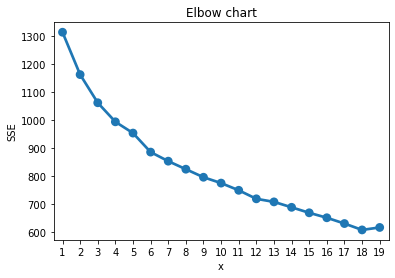

In [10]:
from sklearn.cluster import KMeans
sse={}
for k in range(1,20):
    kmeans= KMeans(n_clusters=k,random_state=100)
    kmeans.fit(wr_normalized)
    sse[k]=kmeans.inertia_
sns.pointplot(x=list(sse.keys()),y=list(sse.values()));
plt.xlabel('x');
plt.ylabel('SSE');
plt.title('Elbow chart');

Question-F: How many clusters will you use for your k-means model? (Remember, as noted in several places throughout the course material, there is no “right” answer to this question. You may wish to answer this immediately after seeing your elbow plot, or after doing some more experimentation).

In [11]:
#change k value in n_clusters=k to compare each cluster
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(wr_normalized)
cluster_labels=kmeans.labels_

In [12]:
kmeans2=wr_normalized.assign(cluster=cluster_labels)
kmeans2.groupby(['cluster']).agg({
'rider_group':'mean',
'max_speed':'mean',
'total_height':'mean',
'soak_level':'mean',
'max_hourly_throughput':'mean',
'avg_duration' :'mean',
'square_feet':'mean',
'installation_cost':'mean',
'maintenance_cost' :'mean'}).round(2)

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
cluster,,,,,,,,,
0,-0.31,-0.44,-0.35,-0.96,0.24,-0.04,0.43,-0.25,0.45
1,0.16,-0.40,-0.31,0.37,0.30,0.38,-0.89,-0.27,-0.63
2,0.12,0.66,0.51,0.47,-0.42,-0.26,0.35,0.41,0.13


Finally I will use 6 clusters for kmeans model.From the Elbow chart we can see the obvious decreased slope when the cluster is 3, 4 and 6. Then we compare the kmean models, which shows that cluster 6 is more detailed and the segmentation is more specific in variables.  

Question-G: Build a k-means model with your desired number of clusters

In [13]:
kmeans=KMeans(n_clusters=6,random_state=100)
kmeans.fit(wr_normalized)
cluster_labels=kmeans.labels_

Question-H: Generate and show summary statistics about each of your clusters.

In [14]:
kmeans2=wr_normalized.assign(cluster=cluster_labels)
kmeans2.groupby(['cluster']).agg({
'rider_group':'mean',
'max_speed':'mean',
'total_height':'mean',
'soak_level':'mean',
'max_hourly_throughput':'mean',
'avg_duration' :'mean',
'square_feet':'mean',
'installation_cost':'mean',
'maintenance_cost' :'mean'}).round(2)

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
cluster,,,,,,,,,
0,-0.25,-0.40,0.20,-1.03,0.28,-0.07,-0.34,0.03,-1.41
1,1.27,0.59,-0.68,0.02,-0.25,-0.33,-0.19,-0.05,-0.27
2,-0.58,-0.75,-0.48,-0.83,-0.06,0.17,0.23,-0.50,0.79
3,-0.21,-0.33,-0.07,0.86,0.42,1.08,-0.65,0.16,0.05
4,0.01,0.18,0.55,0.47,-1.08,-0.29,0.89,0.73,0.25
5,-0.39,0.79,0.87,0.48,0.83,-0.69,0.02,-0.22,0.11


In [15]:
kmeans2['cluster'].value_counts()

2    30
1    28
3    25
4    23
5    22
0    18
Name: cluster, dtype: int64

Question-I: Build any four simple visualizations to help management better understand your clusters (a simple visualization could be a histogram, a barplot, a scatterplot, etc.) You may wish to facet your visualizations by cluster. For each one of your visualizations, include 2-3 sentences of description/ explanation. What does it show about your model?

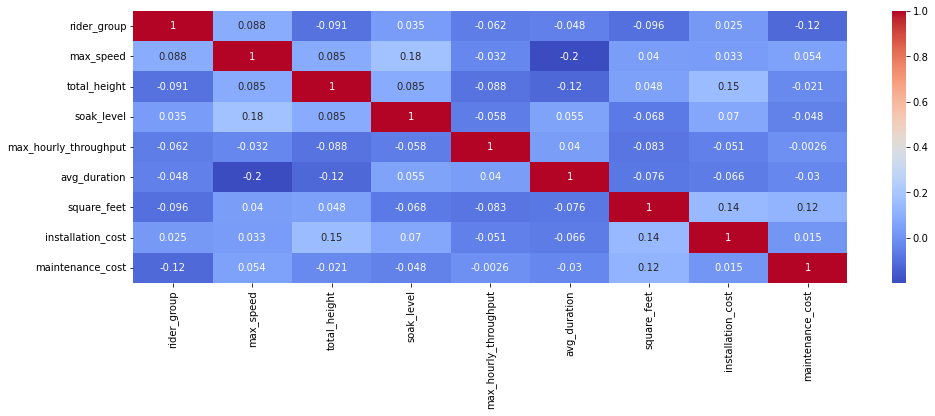

In [16]:
# find each variable's correlation first
plt.figure(figsize=(16,5))
sns.heatmap(wr_normalized.corr(),annot=True,cmap="coolwarm");

Heatmap is a graphical representation of data where values are depicted by color, which presents the correlation between each variable. This heatmap compares 9 variables in Lobster land. We can directly tell any 2 variable's correlation rate and see how strong they correlated. 

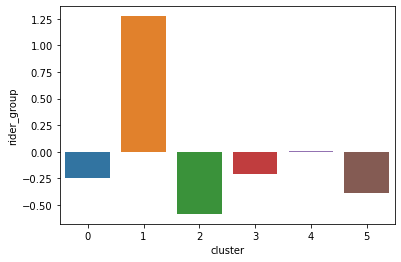

In [17]:
sns.barplot(x='cluster', y='rider_group',ci=None,data=kmeans2);

This barplot shows each cluster's rider group loadable quantity. Because we normalize the data with mean equals to 0, the quantity is not what we normally think.  The quantity above 0 indicates that the loadable quantity in that cluster can have more people on the ride at the same time while the quantity below 0 shows that less people on the ride at the same time. Lower the number of rider group, less people on the ride.

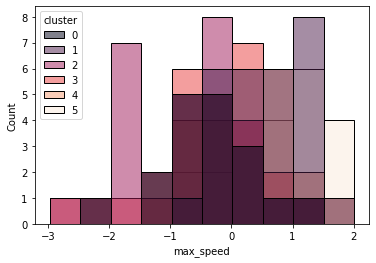

In [18]:
sns.histplot(data=kmeans2,x='max_speed',hue='cluster',palette='rocket');

This histplot calculates the max speed's numbers in each cluster. Each cluster according to its max speed lies in the corresponded max speed range in x-axis. Each column accumulates that range's quantity, no matter it belongs to certain cluster, thus we can see one area of max speed has several cluster's stack. Cluster 5 mainly focus on highest max speed area while cluster 0 is more dispersed.

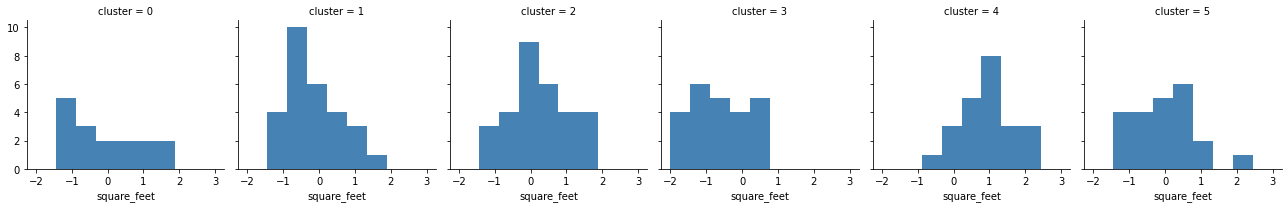

In [19]:
g = sns.FacetGrid(kmeans2, col="cluster",margin_titles=True)
bins = np.linspace(-2, 3, 10)
g.map(plt.hist, "square_feet", color="steelblue", bins=bins);

Faceting is the act of breaking data variables up across multiple subplots. This facetGrid object takes a cluster dataframe as input and the square feet as row to calculate the square feet range in columns among 6 clusters. We can see the square feet in cluster 3 is near 0 below that is lower than other clusters,showing that rides in cluster 3 take smaller spaces to play.  

Question-J: Give a descriptive name to each one of your clusters, along with a few sentences of explanation for the name that you chose. For each cluster, also include a couple sentences about targeting. What types of visitors would be interested in these groups of rides, and how should Lobster Land reach them? You can exercise some ‘creative freedom’ here with this answer.

Cluster0: 'Dryer in the water'; 
Because the soak level is the lowest among all other clusters. They are the kind of the targeted people who come to lobster just want to experience the atmosphere like senior couples and only 'try' something is enough for them since as we all see in cluster 0 that the maintenance cost is also the lowest. We focus on generating some activities near these gentle rides once these people finishing playing the rides, they can watch the play and have the most fun and relax here. 

Cluster1: 'Advanced Giant'; 
Because rider group is the number of riders that go on the ride together at one time and this rider group in this cluster is the highest. Advanced Giants together experience the stimulus in Lobster. They are the kind of the targeted people who come in a large team like 5 plus people. It seems that all levels of rides are fine for them and the only need is that they want to play together. Lobster could launch a team member discount tickets,attracting companies for choosing company team building at the lobster. 

Cluster2: 'Sun flower';
Because the installation is the lowest while maintenance cost is the highest in all clusters and with the lowest max speed I am wondering this is the ride for kids since kids are like sun flowers, so sweet and naive. Parents take children to Lobster for fun in weekend. We need to make sure the equippment is in safe. Employees in lobster land could dress up as fairy tale characters to attract those lovely children. I believe seeing children enjoying the ride and the activities, parent would definitely feel satisfied and recommend to their friends. 

Cluster3: 'Water diver'; 
Because this cluster has the highest soak level and takes the longest average duration. They are the kind of the targeted people who enjoy staying in the water. Since this ride takes the longest time people who want to play this ride may wait for longer time than others,employees may create some games that can make people participate in the interaction while not feel bored waiting.

Cluster4: 'Journey explorer';
Because this ride takes the largest floor space and the installation cost is the highest. This ride makes tourists feel like they are the journey explorers. They are the kind of the targeted people who fully enjoy playing in the water world! It's no matter how stimulated the ride is, it is in the water that they really care. Lobster land needs to observer the water quality and make sure regularly change the water. 

Cluster5: 'Thrill seeker'; 
Because this cluster has the highest total height with maximum speed and the playing time is also the longest, which creates the maximum stimulation during the rides. They are the kind of targeted people who love pursuing excitement. Under the safety, Lobster could generate the sensory and visual dual stimulation experience at the same time like broadcasting the shouting voice loudly to make those waiting-in line customers feel excited. 

Question-K: How can Lobster Land use this model? This is the most open-ended question on the assignment, so stop and take a moment with it – it’s not a “throwaway question.” Write 2-3 paragraphs here to assess the way that Lobster Land might be able to use these results. You might want to think about some ‘what if’ scenarios, and some ways in which Lobster Land’s priorities could impact their decision regarding the way to use the model.

Lobster land can use this model to better understand their customers and do specific segmentation, manage activities targeting different types of customers. As we can see in the summary statistics of kmeans model. Cluster 2 and 1 take large proportions. Lobster land may pay more attention to the targeted group like children or those people in groups since with focused market strategy it is more likely to build brand image and get customer loyalty. 

We make our tourists satisfied with the service and environment in Lobster land, it is more likely to come again and even recommend to their friends. This is so-called word of mouth spread. To some extent, it saves the advertising budget because people tend to believe those people who they know and trust their personal experience rather than the advertisments. 

In such competitive reality, winning the quantities of customers means holding the marketing shares. Great people can start a new successful business not because his platform but his customers' resources. It is exactly customers that generate the profits. And that's why some professional jargons appear like customer price, customer lifetime circle and etc. 

Part II: Conjoint Analysis with a Linear Model 

Question-A: Read the dataset entertainment.csv into your local environment in Jupyter Notebook.

In [21]:
entertainment=pd.read_csv('/Users/luoyayuan/Desktop/Class Slides/654/assignment2/entertainment.csv')
entertainment.info()
entertainment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bundleID       2592 non-null   int64  
 1   live_science   2592 non-null   object 
 2   live_nature    2592 non-null   object 
 3   live_magic     2592 non-null   object 
 4   dance_troupes  2592 non-null   object 
 5   sing_styles    2592 non-null   object 
 6   comedy_styles  2592 non-null   object 
 7   show_length    2592 non-null   int64  
 8   avg_rating     2592 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 182.4+ KB


,bundleID,live_science,live_nature,live_magic,dance_troupes,sing_styles,comedy_styles,show_length,avg_rating
0,1,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,10,7.516434
1,2,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,20,7.392987
2,3,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,30,8.921361
3,4,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,10,7.726377
4,5,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,20,9.659494


Question-B: Based on the descriptions shown above, which of your variables are numeric, and which are categorical? (The standard you should use when answering this is that something that is both represented by a number, and for which that number has valid mathematical meaning, is numeric).

Show length and average rating are numeric while the rest of the other variables are categorical. The bundleID is categorical because we cannot say bundleID1 plus bundleID2 equals bundleID3. It is meaningless and does not have mathmatical effect.

Question-C: After first removing the bundleID variable, use the pandas get_dummies() function in order to prepare the remaining variables for use in a linear model. Inside this function, include this argument: drop_first = True. Doing this will save us from the multicollinearity problem that would make our model unreliable. Be sure to dummify ALL of your input variables, even the numeric ones.
Why should the numeric input variables based on this survey data be dummified?

In [28]:
entertainment.drop('bundleID',1,inplace=True)

/var/folders/69/sjzrfpp90kb586qq0vrpgyjw0000gn/T/ipykernel_4975/1087855472.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  entertainment.drop('bundleID',1,inplace=True)


In [29]:
entertainment.head()

,live_science,live_nature,live_magic,dance_troupes,sing_styles,comedy_styles,show_length,avg_rating
0,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,10,7.516434
1,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,20,7.392987
2,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,30,8.921361
3,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,10,7.726377
4,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,20,9.659494


In [30]:
entertainment.isnull().values.any()

False

In [45]:
entertainment2=pd.get_dummies(entertainment,drop_first=True, 
                              columns=['live_science','live_nature','live_magic',
                                       'dance_troupes','sing_styles','comedy_styles','show_length'])

In [46]:
entertainment2.head()

,avg_rating,live_science_Liquid Air Show,live_science_Science of Fireworks,live_nature_Fun With Vipers and Cobras,live_nature_Wide World of Canines,live_magic_Mind Reader,dance_troupes_Celtic Folk Dance,dance_troupes_Hip-Hop Fusion,dance_troupes_Salsa Vida,sing_styles_Italian Opera,sing_styles_Open Mic,sing_styles_Wiggles,comedy_styles_Open Mic,comedy_styles_Slapstick,show_length_20,show_length_30
0,7.516434,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.392987,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.921361,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7.726377,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.659494,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


Here we should dummify the numeric variable 'show_length' because this numeric variable acts in categorical nature. As we can see above in entertainment table ,show length only has 3 changes: 10, 20, 30.

Question-D: Build a linear model with your data, using the average rating as the outcome variable, and with all of your other variables as inputs.

In [47]:
entertainment.sort_values(by=['avg_rating'],ascending=False)

,live_science,live_nature,live_magic,dance_troupes,sing_styles,comedy_styles,show_length,avg_rating
79,Liquid Air Show,All About Crustaceans,Card Tricks,Salsa Vida,Beatles,Open Mic,20,9.986481
95,Liquid Air Show,All About Crustaceans,Card Tricks,Salsa Vida,Italian Opera,Slapstick,30,9.971483
124,Liquid Air Show,All About Crustaceans,Card Tricks,Celtic Folk Dance,Wiggles,Open Mic,20,9.961208
1119,Science of Fireworks,All About Crustaceans,Mind Reader,Celtic Folk Dance,Beatles,Slapstick,10,9.948701
328,Liquid Air Show,Wide World of Canines,Card Tricks,Hip-Hop Fusion,Beatles,Slapstick,20,9.940039
...,...,...,...,...,...,...,...,...
1109,Science of Fireworks,All About Crustaceans,Mind Reader,Salsa Vida,Open Mic,Improv,30,0.144726
681,Liquid Air Show,Fun With Vipers and Cobras,Card Tricks,Salsa Vida,Open Mic,Open Mic,10,0.121504
1439,Science of Fireworks,Wide World of Canines,Mind Reader,Celtic Folk Dance,Open Mic,Open Mic,30,0.109742
1446,Science of Fireworks,Fun With Vipers and Cobras,Card Tricks,Atlanta Ballet,Beatles,Open Mic,10,0.086412


In [54]:
entertainment2.columns

Index(['avg_rating', 'live_science_Liquid Air Show',
       'live_science_Science of Fireworks',
       'live_nature_Fun With Vipers and Cobras',
       'live_nature_Wide World of Canines', 'live_magic_Mind Reader',
       'dance_troupes_Celtic Folk Dance', 'dance_troupes_Hip-Hop Fusion',
       'dance_troupes_Salsa Vida', 'sing_styles_Italian Opera',
       'sing_styles_Open Mic', 'sing_styles_Wiggles', 'comedy_styles_Open Mic',
       'comedy_styles_Slapstick', 'show_length_20', 'show_length_30'],
      dtype='object')

In [55]:
x=entertainment2[['show_length_20','show_length_30','live_science_Liquid Air Show',
       'live_science_Science of Fireworks',
       'live_nature_Fun With Vipers and Cobras',
       'live_nature_Wide World of Canines', 'live_magic_Mind Reader',
       'dance_troupes_Celtic Folk Dance', 'dance_troupes_Hip-Hop Fusion',
       'dance_troupes_Salsa Vida', 'sing_styles_Italian Opera',
       'sing_styles_Open Mic', 'sing_styles_Wiggles', 'comedy_styles_Open Mic',
       'comedy_styles_Slapstick']]
y=entertainment2['avg_rating']

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor=LinearRegression()
regressor.fit(x,y)

LinearRegression()

Question-E: Display the coefficient values of your model inputs

In [57]:
regressor.intercept_

6.2443442158046905

In [53]:
coef_df=pd.DataFrame(regressor.coef_,x.columns,columns=['coefficient'])
coef_df

,coefficient
show_length_20,0.513810
show_length_30,-0.081301
live_science_Liquid Air Show,0.119588
live_science_Science of Fireworks,-0.716544
live_nature_Fun With Vipers and Cobras,-2.308140
live_nature_Wide World of Canines,-0.909696
live_magic_Mind Reader,-0.198544
dance_troupes_Celtic Folk Dance,0.262085
dance_troupes_Hip-Hop Fusion,0.700387
dance_troupes_Salsa Vida,0.233955


Question-F: Write a paragraph or two for Lobster Land management about what your model is showing you.What other insights can you draw from this? Is there anything else you would want to consider before simply recommending that Lobster Land implement the ‘most popular’ options? Remember, Lobster Land hired you as a consultant --don’t be afraid to show some creativity here.

Since we use drop_first = True to remove the multicollinearity problem, the model does not show all the predictors. From the coefficient values of my model,the overall feedback of dance troupes are popular among customers since all the coeffients are positive. However, the live nature shows are not so welcomed since the coeffients are negative.It is a good signal for lobster land to think about change the show style and creat innovate attractions.Show length is better to be set within 30 minutes. Too long to be tired for tourists.
Not only recommend Lobster Land to implement the ‘most popular’ options, but also it is better to do some adjustment for unwelcomed activities.

Part III: Wildcard: Marketing & Segments

Find ANY advertisement…ANYWHERE. As you walk around in your daily life, you might look for an ad on the side of the T, on a bus stop, on a poster, etc. Alternatively, you could use an advertisement that you encounter while browsing the web.
a. Take a picture of the ad that you see (if it’s in the ‘real world’). Or, if the ad you select is online, take a screenshot from your phone or your laptop to capture this advertisement.
b. Write ONE thoughtful paragraph that addresses the issue of segmentation. What consumer segment is your ad targeting? What makes you think this? What types of consumers are in the segment? Are you part of the segment? Or,
alternatively, is your ad an undifferentiated (mass market) ad? Finally, what is your opinion of this ad – is it effective? You can embed your image, along with your paragraph write-up, in a Markdown cell in Jupyter Notebook. Alternatively, you could upload your image and paragraph in a separate file, such as a Word doc. The ad can be in any language – but if it’s not in English, please translate.

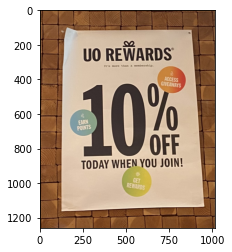

In [20]:
from PIL import Image
myimage=Image.open('/Users/luoyayuan/Desktop/ad.png');
plt.imshow(myimage);

  This is an ad I took in the clothing store UrbanOutfitter. The purpose is to attract more new customers to become the brand's membership by offering a 10% discount when they pay at the cashier. I am definitely in the segment since I never bought new cloths here before in the US. I'd love to become a membership because with a 10% discount I can save nearly $20 on my total consumption and the registration is very simple only by downloading the UO app and providing the email address, date of birth to the cashier. 
  
  I think this is an effective ad because it is hung on the exact position where customers facing when checking out at the cashier. When I waited in line paying the bill, I heard several customers in front of me asking about the discount and they all love to become a membership. 
  
  From my point of view the reason behind giving a discount is that when more customers become their membership, they could do membership management by collecting more membership data. For example, sending email about activities or new clothes they can check the cliking rate to judge those "active memberships" and target them to do more specified activities. Also, becoming the member they need to download the app. Some people may spend some time on looking through the clothes on app. To some extent, the app may generate desire to buy the clothes.